# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [60]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]


In [61]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

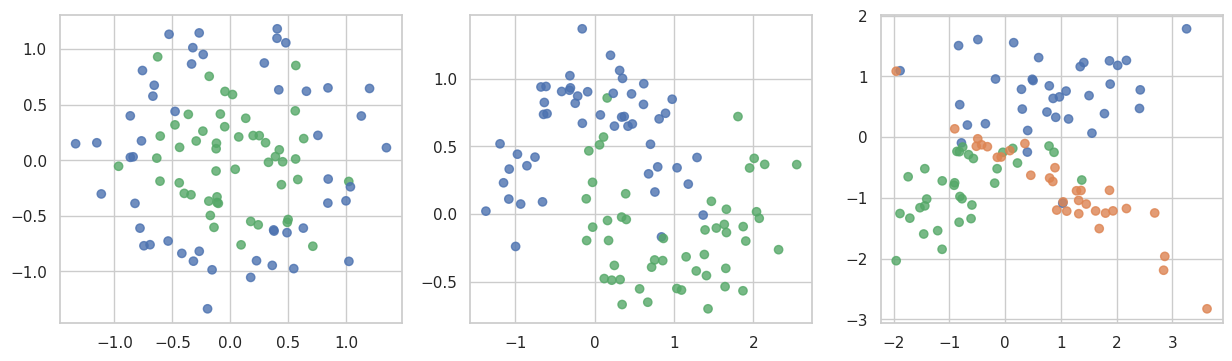

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

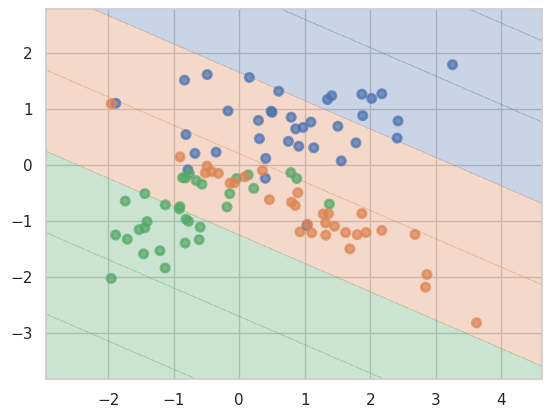

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

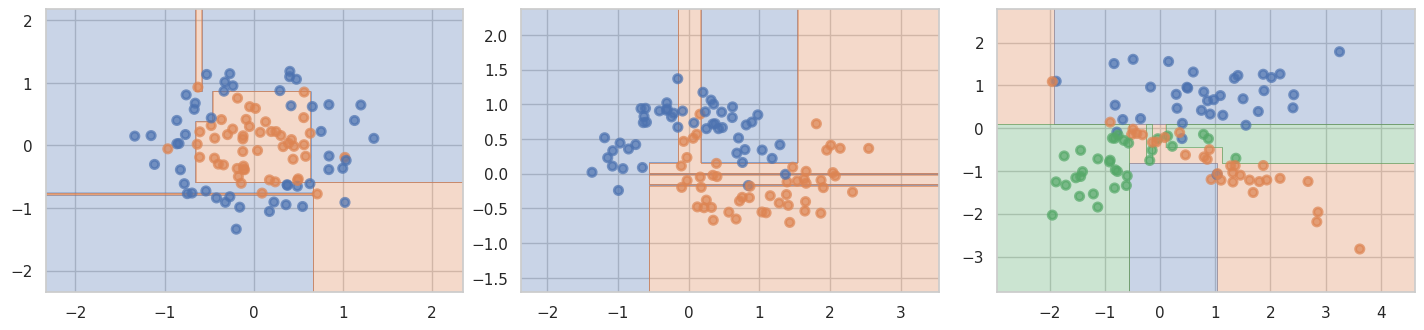

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    X, y = datasets[i]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    dt = DecisionTreeRegressor( random_state=42)
    dt.fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(dt, X, y)


__Ответ:__ сильно везде

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

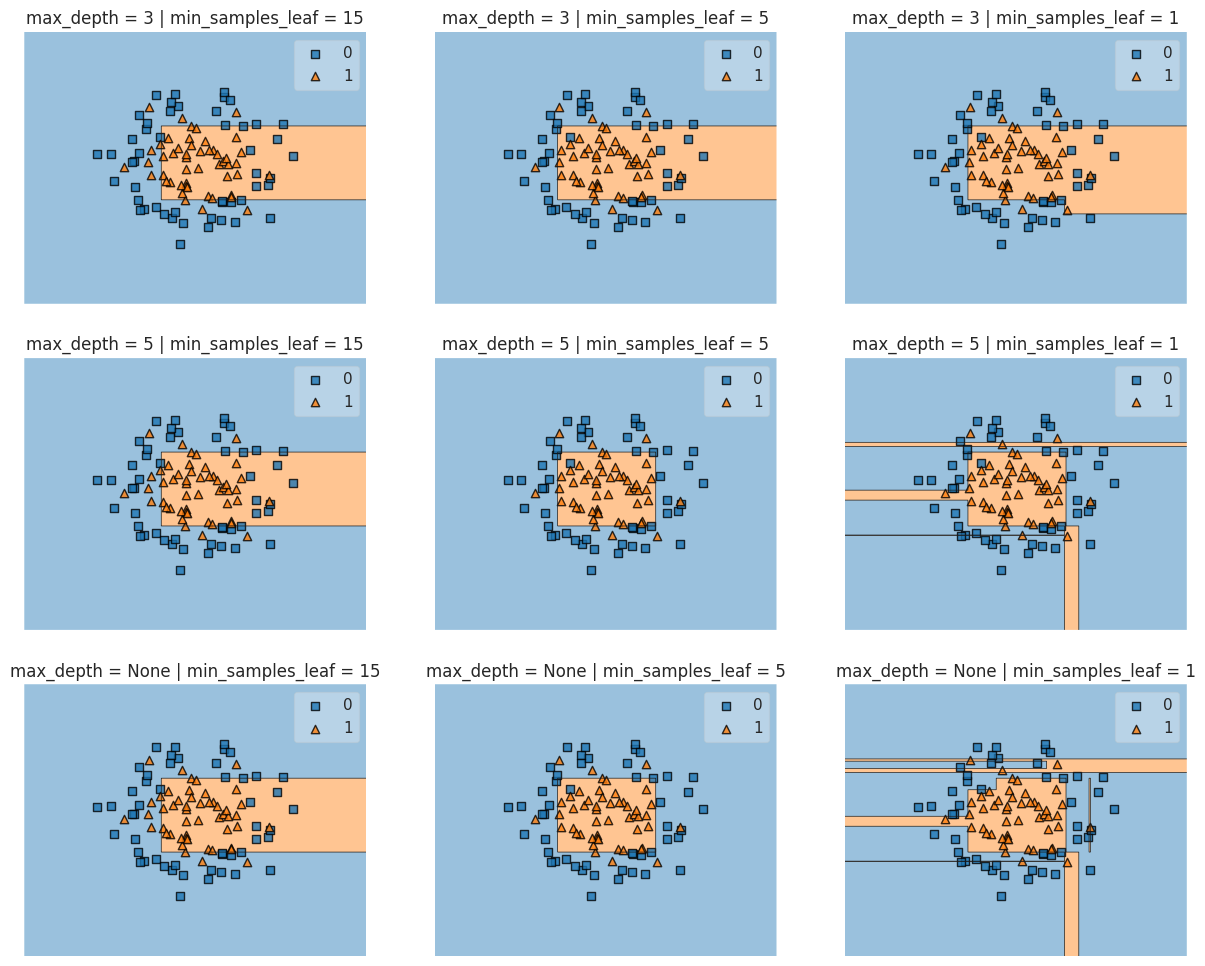

In [117]:
from sklearn.model_selection import GridSearchCV #0 сет
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, max_depth in enumerate([3,5,None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13
        )
        X, y = datasets[0]
        dt.fit(X, y)
        ax[i][j].set_title(
            "max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf)
        )
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

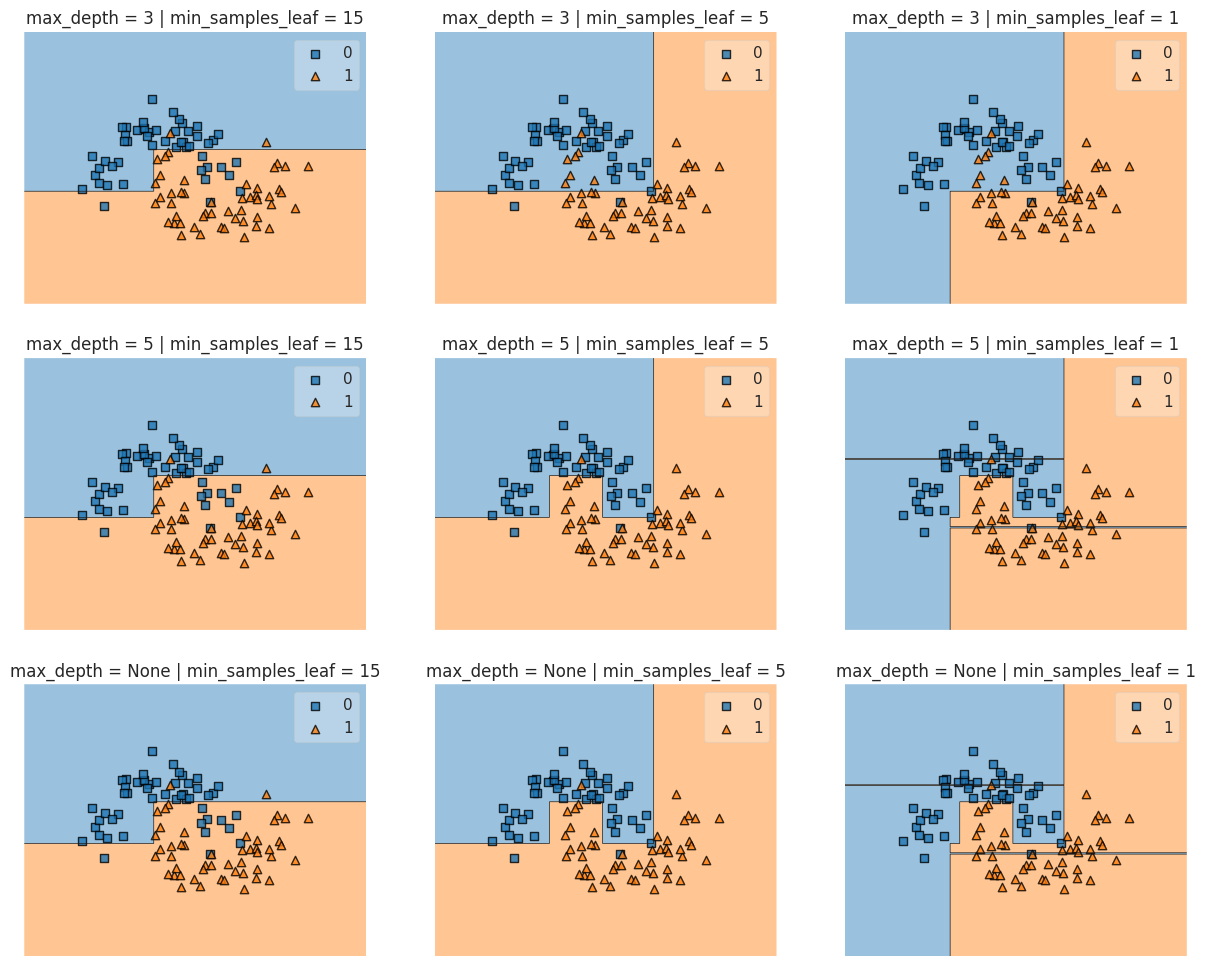

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12)) #1 сет
for i, max_depth in enumerate([3,5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13
        )
        X, y = datasets[1]
        dt.fit(X, y)
        ax[i][j].set_title(
            "max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf)
        )
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

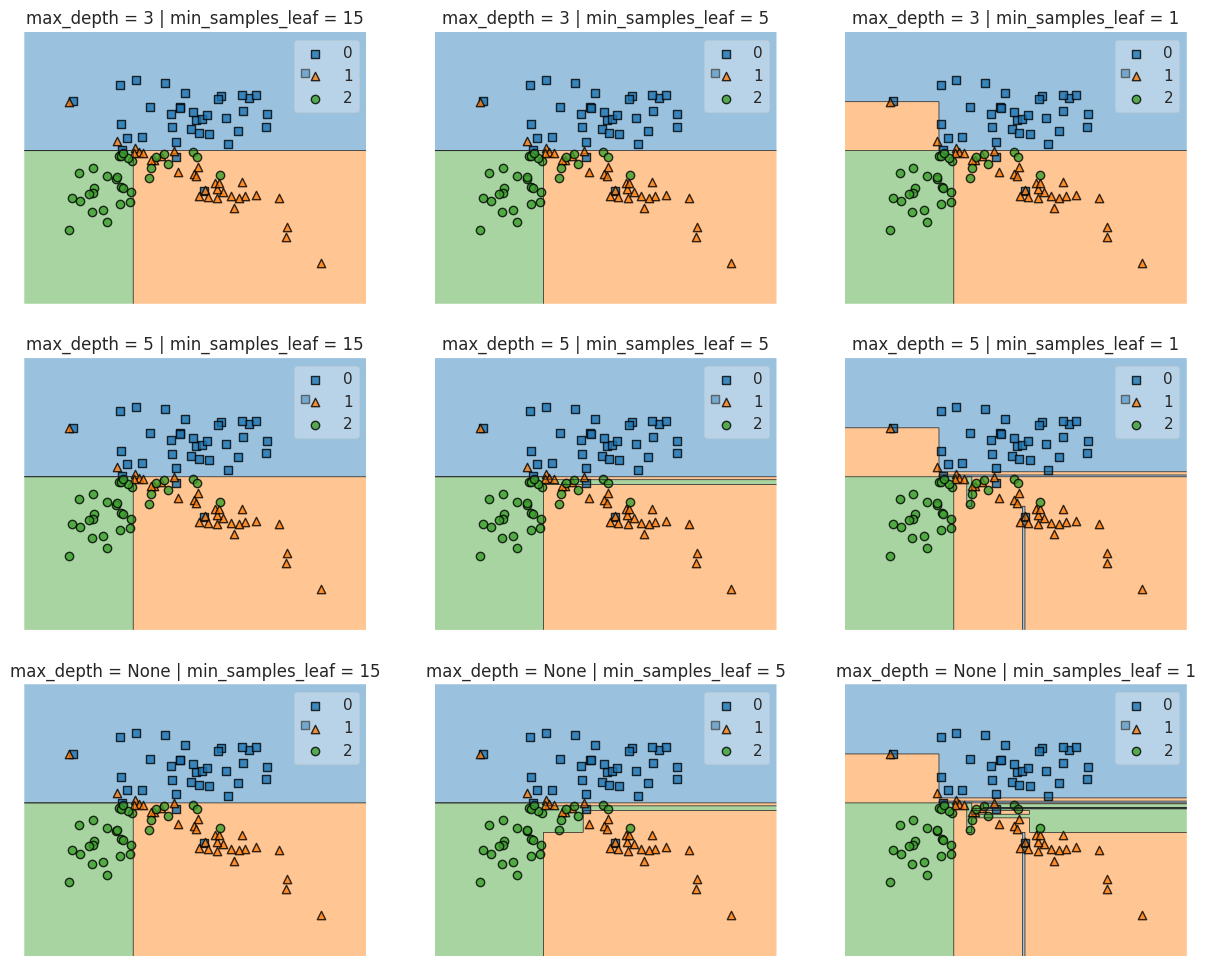

In [118]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12)) #2 сет
for i, max_depth in enumerate([3,5,None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13
        )
        X, y = datasets[2]
        dt.fit(X, y)
        ax[i][j].set_title(
            "max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf)
        )
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

**Ответ**: тенденция одинаковая на всех выборках, чем глубже дерево, тем больше оно переобучается под выборку, если мы не указываем конкретную глубину дерева и выбираем мин число объектов в листе = 1, то модель переобучится на 100 процентов, поэтому надо внимательнее выбирать эти значения, чтобы модель имела хоть какую-то обоющающую способность



В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [119]:
# мои миллион попыток не помогли победить контест, где я пыталась оптимизировать по времени, поэтому в итог сюда я засунула с циклом внутри, чтобы было понятнее, что происходит
#плюс график ниже хоть норм рисуется :(
import numpy as np

def gini_value(p1, p0):

    return 1 - p1**2 - p0**2

def find_best_split(feature_vector, target_vector):
    thresholds = np.sort(feature_vector)
    ginis = np.zeros_like(thresholds)
    for i, threshold in enumerate(thresholds):
        left_mask = feature_vector <= threshold
        right_mask = feature_vector > threshold
        left_classes = target_vector[left_mask]
        right_classes = target_vector[right_mask]

        p1_left = np.mean(left_classes)
        p0_left = 1 - p1_left
        p1_right = np.mean(right_classes)
        p0_right = 1 - p1_right

        gini_left = gini_value(p1_left, p0_left)
        gini_right = gini_value(p1_right, p0_right)

        total_count = len(target_vector)
        left_count = np.sum(left_mask)
        right_count = total_count - left_count
        gini = (left_count / total_count) * gini_left + (right_count / total_count) * gini_right

        ginis[i] = gini
    best_index = np.argmin(ginis)
    threshold_best = thresholds[best_index]
    gini_best = ginis[best_index]
    return thresholds, ginis, threshold_best, gini_best


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/students.csv'
df =pd.read_csv(url)
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


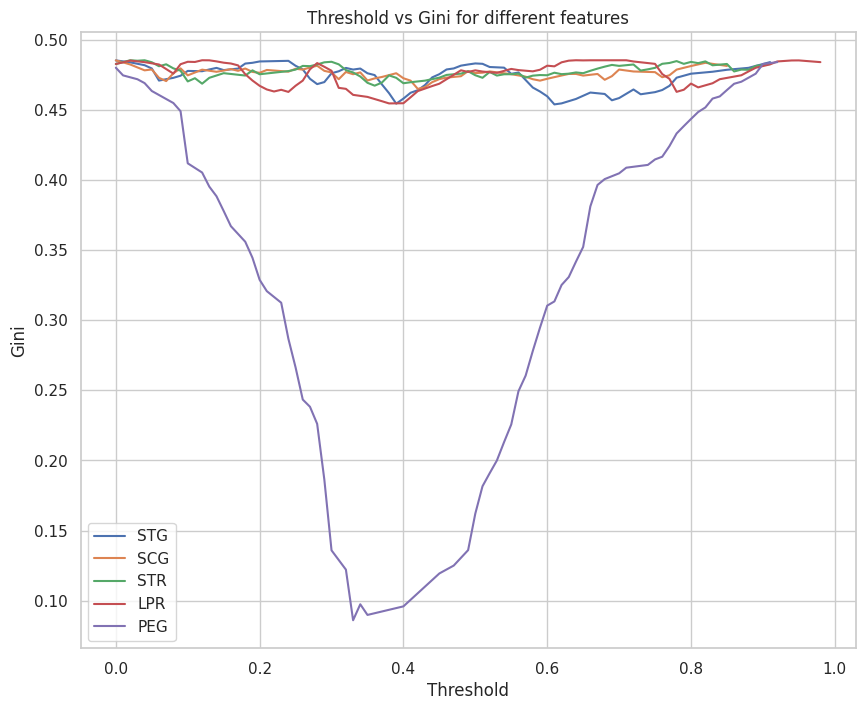

In [121]:
plt.figure(figsize=(10, 8))
for feature in ['STG', 'SCG', 'STR', 'LPR', 'PEG']:
    thresholds, ginis, _, _ = find_best_split(df[feature], df['UNS'])
    plt.plot(thresholds, ginis, label=f'{feature}')

plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.title('Threshold vs Gini for different features')
plt.legend()
plt.show()

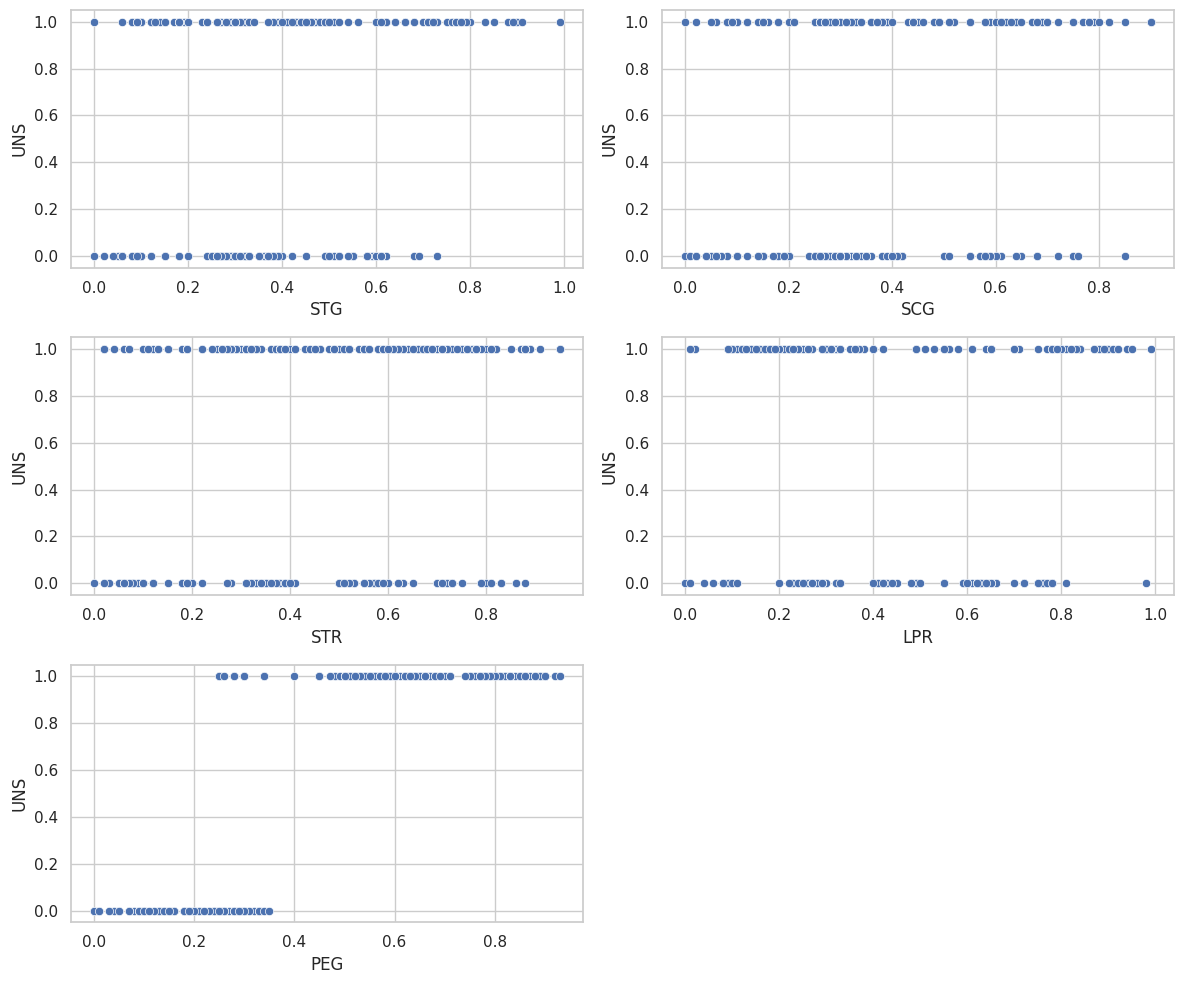

In [122]:
features = df.columns[:-1]
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=df, x=feature, y='UNS')
plt.tight_layout()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** насколько я поняла, когда кривая Джини резко уменьшается и достигает низкого значения, это указывает на то, что в этой точке происходит деление, которое создает однородные подгруппы, поэтому лучше проводить деление по PEG, и тот результат согласуется со scatter графиком, так как на нем наиболее хорошо видна область, которая делит таргет на две части. На других точечных графиках не так хорошо видна лучшая область разделения.Кривые для "хороших" признаков характеризуются существенным падением к минимальным значениям джини, показывая точку, где деление является наиболее оптимальным. Наименее полезные признаки для разделения создают кривые с незначительными изменениями значения Джини по всем пороговым значениям, указывающими на то, что ни одно деление значительно не улучшает однородность групп.


__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [123]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if not all(ft in ["real", "categorical"] for ft in feature_types):
            raise ValueError("There is an unknown feature type")
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def gini_value(self, p1, p0):
        return 1 - p1**2 - p0**2

    def find_best_split(self, feature_vector, target_vector):
        thresholds = np.sort(np.unique(feature_vector))
        best_threshold = None
        best_gini = float("inf")
        for threshold in thresholds:
            left_mask = feature_vector <= threshold
            right_mask = feature_vector > threshold
            left_classes = target_vector[left_mask]
            right_classes = target_vector[right_mask]

            p1_left = np.mean(left_classes)
            p0_left = 1 - p1_left
            p1_right = np.mean(right_classes)
            p0_right = 1 - p1_right

            gini_left = self.gini_value(p1_left, p0_left)
            gini_right = self.gini_value(p1_right, p0_right)

            total_count = len(target_vector)
            left_count = np.sum(left_mask)
            right_count = total_count - left_count
            gini = (left_count / total_count) * gini_left + (right_count / total_count) * gini_right

            if gini < best_gini:
                best_gini = gini
                best_threshold = threshold

        return best_threshold, best_gini

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, float("inf"), None
        for feature in range(sub_X.shape[1]):
            feature_vector = sub_X[:, feature]
            threshold, gini = self.find_best_split(feature_vector, sub_y)

            if gini < gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector <= threshold
                threshold_best = threshold

        if feature_best is None or (self._min_samples_split is not None and np.sum(split) < self._min_samples_split):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        node["threshold"] = threshold_best

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['class']

        if x[node['feature_split']] <= node['threshold']:
            return self._predict_node(x, node['left_child'])
        else:
            return self._predict_node(x, node['right_child'])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        return np.array([self._predict_node(x, self._tree) for x in X])




__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [138]:
mush_url = "https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/agaricus-lepiota.data"
mush_data = pd.read_csv(mush_url)
X = mush_data.iloc[:, 1:]
y = mush_data.iloc[:, 0]

encoder = LabelEncoder()
for column in X.columns:
    X[column] = encoder.fit_transform(X[column])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
feature_types = ["categorical"] * X_train.shape[1]
clf = DecisionTree(feature_types)
clf.fit(X_train, y_train)
# predictions = clf.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)


KeyError: ignored

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, make_scorer

urls = [
    # 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
]

data_encoded = []
for url in urls:
    df = pd.read_csv(url, header=None)
    le = LabelEncoder()
    df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
    data_encoded.append(df_encoded)
X = mush_data.iloc[:, 1:]
y = mush_data.iloc[:, 0]
clf = DecisionTreeClassifier()

for df in data_encoded:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    scores = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(accuracy_score))
    print(scores)

[0.39583333 0.72916667 0.53125    0.85416667 0.78125    0.69791667
 0.89583333 0.83333333 0.93684211 0.87368421]
[0.62427746 0.79190751 0.93063584 0.77456647 0.9017341  0.94797688
 0.87283237 0.89017341 0.95930233 0.95348837]
[0.75154321 0.94598765 0.69984568 0.75       0.80941358 0.71604938
 0.85493827 0.78549383 0.98302469 0.83101852]


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
я разочарована в себе